<a href="https://colab.research.google.com/github/Rmianm/Modelos-Regresion-Lineal/blob/master/Regresi%C3%B3n_Lineal_Simple_con_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresión Lineal Simple


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Nos permite dividir los datos
from sklearn.linear_model import LinearRegression #modelo particular

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/salarios.csv')
#Si se abre desde un excel y este tiene varias hojas se utiliza pd.read_excel('nombre.xlsx',sheet_name='nombre_hoja')
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [5]:
correlation = dataset.corr()
round(correlation,3)
#Si el factor es bajo no podemos hacer una buena predicción

,Aexperiencia,Salario
Aexperiencia,1.000,0.969
Salario,0.969,1.000


In [6]:
dataset.shape #tamaño del dataset

(30, 2)

In [7]:
#Procedemos a dividir los datos 
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values #Target (variable de predicción)

In [ ]:
#Otra manera de separar las variables
x = dataset['Aexperiencias'].values
y = dataset['Salario'].values

In [ ]:
print(x)

In [11]:
#Entrenamiento del modelo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 0)
#test size me define el porcentaje que utilizaré para entrenar, si eliges 0.2 es decir que el entrenamiento será el 80% y 30% para prueba.
#Random_state, si vamos a tener que modificar el set de datos para entrenar
#con 0 o cualquier otro numero entero fijo siempre tomaremos los mismos datos aleatorios (los guarda), es decir que si ejecuto de nuevo la linea estos datos permanecerán guardados y no se altera mi modelo.
#Con None no se escoge los mismos

In [13]:
#Ajustamos las variables al modelo
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

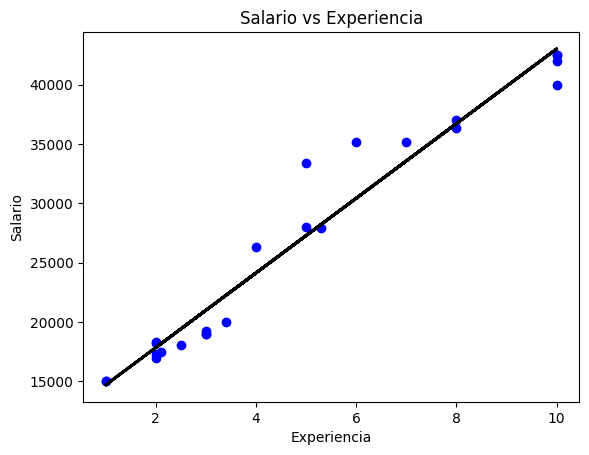

In [26]:
viz = plt
viz.scatter(x_train,y_train,color = 'blue')
viz.plot(x_train,regressor.predict(x_train),linewidth=2,color='black')
viz.title('Salario vs Experiencia')
viz.xlabel('Experiencia')
viz.ylabel('Salario')
viz.show()

####La comparación entre la dispersión de los puntos de entrenamiento y la línea de regresión ajustada en el gráfico de dispersión te ayuda a visualizarqué tan bien el modelo se ajusta a los datos de entrenamiento.

####Si la línea de regresión sigue aproximadamente la tendencia de los puntos, entonces el modelo está ajustando bien los datos de entrenamiento. Si la línea de regresión parece desviarse significativamente de la tendencia de los puntos, entonces el modelo puede no estar ajustando bien los datos y es posible que debas revisar tu modelo o los datos de entrada. Por lo tanto, puedes usar esta comparación como una forma de evaluar la calidad de tu modelo.

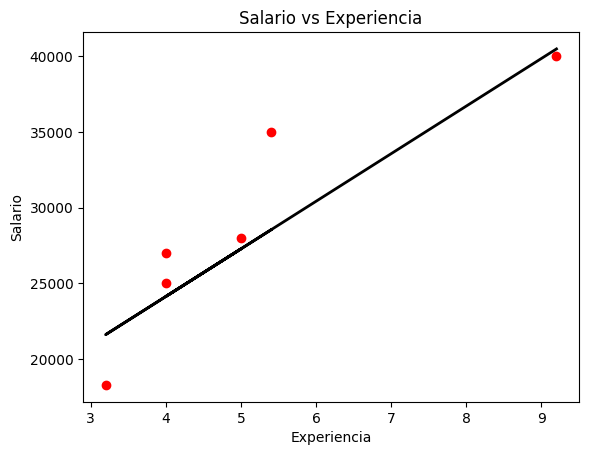

In [35]:
#La comparación entre los puntos de datos reales y las predicciones del modelo
#nos permite evaluar qué tan bien se ajusta la línea de regresión a los datos y cómo de bien el modelo generaliza para datos nuevos.
viz= plt
viz.scatter(x_test,y_test,color = 'red')
viz.plot(x_test,regressor.predict(x_test),linewidth=2,color='black')
viz.title('Salario vs Experiencia')
viz.xlabel('Experiencia')
viz.ylabel('Salario')
viz.show()

####Tenemos pocos datos con los cuales estamos validando nuestro conocimiento, podemos incurrie en underfitting.
####para tener un modelo mejor con una prediccion mas adecuada es agregando más información a los datos

In [37]:
#Para poder confirmar esta información
regressor.score(x_test,y_test)
#nos dice qué tan bien nuestro modelo se desempeña en predecir los valores de y en nuevas entradas de x

0.7862437374732997

In [38]:
y_pred = regressor.predict(x_test)

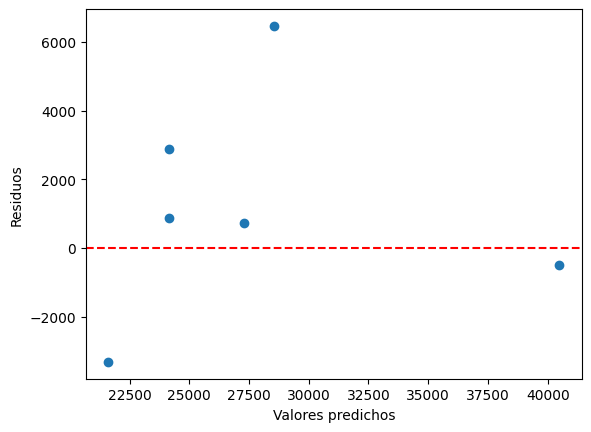

In [39]:
#Además podemos calcular el residuo
#si los residuos están dispersos alrededor de cero sin un patrón obvio, eso es una buena indicación de que el modelo es adecuado para los datos.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#Conclusión
#### Las predicciones se quedan cortas a la hora de compararlas con el valor real, eso se puede presentar por diferentes factores como el underfitting, además hay considerables valor atípicos en el modelo que podemos observar en los dos primeraas gráficas, esto puede solucionarse reemplazandolos por la media o mediana, o alguna otra transofrmación.

####Aunque el Score dio relativamente alto se puede observar en el residuo que los datos están muy dispersos en cuanto al 0, lo cual nos dice que no está prediciendo de manera correcta, lo que buscamos es que los residuos se encuentren cerca al de 0 de manera uniforme.